In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [42]:
data = np.load('./data/data_100_100_norm.npz')

In [43]:
data.files

['arr_0', 'arr_1']

In [44]:
X = data['arr_0']
y = data['arr_1']

In [45]:
X

array([[0.38431373, 0.40784314, 0.44705882, ..., 0.56862745, 0.57647059,
        0.58039216],
       [0.07843137, 0.09411765, 0.10588235, ..., 0.07843137, 0.1254902 ,
        0.18823529],
       [0.27058824, 0.24705882, 0.25098039, ..., 0.74117647, 0.74509804,
        0.74117647],
       ...,
       [0.01568627, 0.03529412, 0.01960784, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.91764706, 0.91764706, 0.92156863, ..., 0.85490196, 0.84313725,
        0.89019608],
       [0.01568627, 0.01568627, 0.01568627, ..., 0.05882353, 0.05882353,
        0.0627451 ]], shape=(450, 10000))

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
X.shape, y.shape

((450, 10000), (450,))

In [48]:
#eigen faces

In [49]:
X1 = X-X.mean(axis=0)

In [50]:
X1.shape

(450, 10000)

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')

In [53]:
x_pca = pca.fit_transform(X1)

In [54]:
x_pca.shape

(450, 450)

In [55]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

Text(0, 0.5, 'cumulative explained variance ratio')

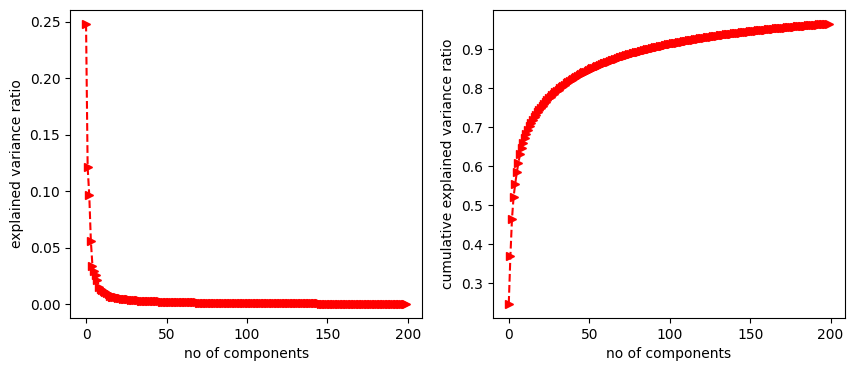

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200], 'r>--')
plt.xlabel('no of components')
plt.ylabel('explained variance ratio')

plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum[:200], 'r>--')
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance ratio')

In [57]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)


In [58]:
x_pca_50.shape

(450, 50)

In [59]:
import pickle 

In [60]:
pickle.dump(pca_50, open('./model/pca_50.pickle', 'wb'))

In [61]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [62]:
x_pca_inv.shape

(450, 10000)

In [63]:
eig_img = x_pca_inv[0,:]

In [64]:
eig_img = eig_img.reshape((100,100))

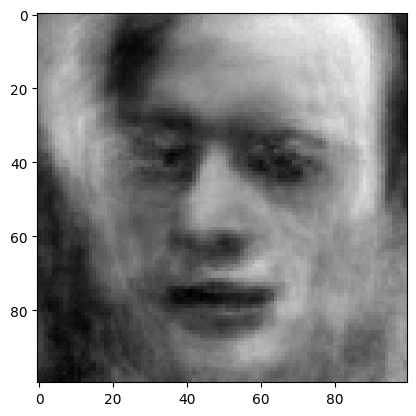

In [65]:
plt.imshow(eig_img, cmap='gray')

In [66]:
def label(y):
    if y == 0:
        return 'Male'
    else:
        return 'Female'


In [67]:
np.random.randint(1001)

501

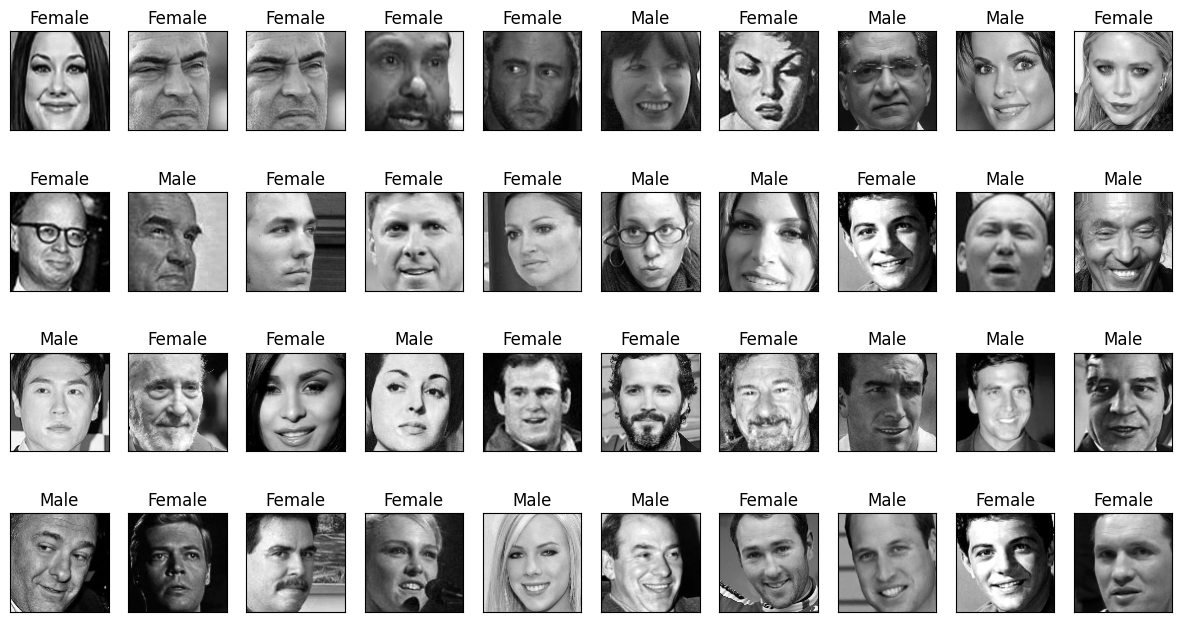

====================Eigen Images====================


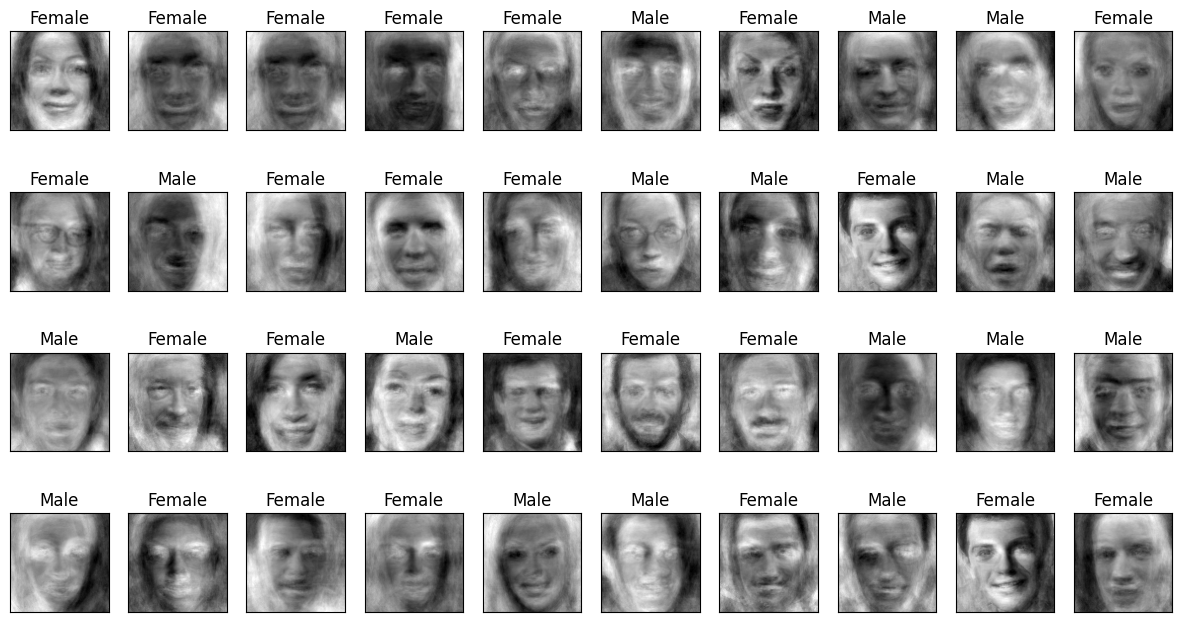

In [70]:
pics = np.random.randint(0, 450, 40)
plt.figure(figsize=(15,8))

for i, pic in enumerate(pics):
    plt.subplot(4,10, i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("=" *20 + 'Eigen Images' + "="*20)
plt.figure(figsize=(15,8))

for i, pic in enumerate(pics):
    plt.subplot(4,10, i+1)
    img = x_pca_inv[pic:pic+1].reshape((100,100))
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [71]:
np.savez('./data/data_pca_50_y_mean.pickle', x_pca_50, y, X.mean(axis=0))